# Beyond linear separation in classification

Linear classification models expect the data to be linearly separable. When this assumption doesn't hold, the model is not expressive enough to properly fit the data. Therefore, we need to apply the same tricks as in regression: feature augmentation (potentially using expert-knowledge) or using a kernel based method.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from helper_kit import plot_decision_function

sns.set()

We will generate a first dataset where the data are represented as two interlaced half circle. This dataset is generated using the function `sklearn.datasets.make_moons`

In [3]:
from sklearn.datasets import make_moons

feature_names = ['Feature #0', 'Features #1']
target_name = 'class'

X, y = make_moons(n_samples=100, noise=.13, random_state=42)

# We store both the data and target in a dataframe to ease plotting
moons = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1),
                     columns=feature_names + [target_name])
data_moons, target_moons = moons[feature_names], moons[target_name]

range_features_moons = {"Feature #0": (-2, 2.5), "Feature #1": (-2, 2)}

Since the dataset contains only two features, we can make a scatter plot to have a look at it

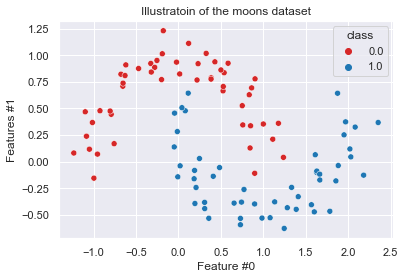

In [8]:
import seaborn as sns

sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
               hue=target_moons, palette=['tab:red', 'tab:blue'])
plt.title('Illustratoin of the moons dataset');

From the intuitions that we got by studying linear model, it should be obvious that a linear classifier will not be able to find a perfect decision function to separate the two classes.

This time we are using a linear support vector machine classifier as predictive model.

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

linear_model = make_pipeline(StandardScaler(), SVC(kernel="linear"))
linear_model.fit(data_moons, target_moons)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

Let's check the decision boundary of such a linear model on this dataset.

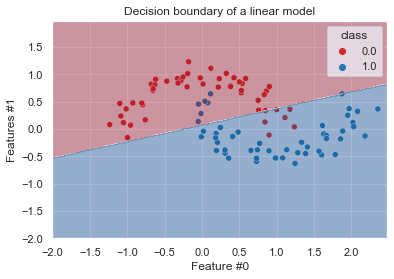

In [9]:
ax = sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                     hue=target_moons, palette=["tab:red", "tab:blue"])
plot_decision_function(linear_model, range_features_moons, ax=ax)
_ = plt.title("Decision boundary of a linear model")

As expected, a linear decision boundary is not enough flexible to split the two classes.  

To push this example to the limit, we will create another dataset where samples of a class will be surrounded by samples from other class.

In [23]:
from sklearn.datasets import make_gaussian_quantiles

feature_names =  ['Feature #0', 'Features #1']
target_name = 'class'

X, y = make_gaussian_quantiles(n_samples = 100, n_features=2, 
                               n_classes=2, random_state=42)
gauss = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1), 
                     columns=feature_names + [target_name])

data_gauss, target_gauss = gauss[feature_names], gauss[target_name]

range_features_gauss = {'Feature #0': (-4, 4), 'Feature #1':(-4, 4)}

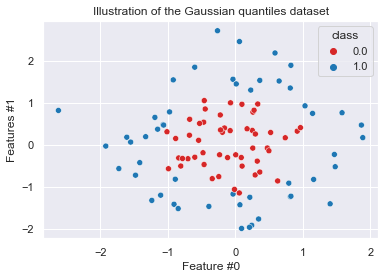

In [24]:
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                    hue=target_gauss, palette=['tab:red', 'tab:blue'])
plt.title('Illustration of the Gaussian quantiles dataset');

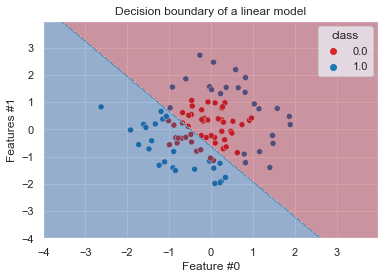

In [25]:
linear_model.fit(data_gauss, target_gauss)
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:red", "tab:blue"])
plot_decision_function(linear_model, range_features_gauss, ax=ax)
_ = plt.title("Decision boundary of a linear model")

It was obvious that linear decision functions cannot be used to separate the classes properly: the model will underfit as it will make errors even on the training set.

In the section about linear regression, we saw that we could use several tricks to make a linear model more flexible by augmenting features or using a kernel. Here, we will use the later solution by using a radial basis function (RBF) kernel together with a support vector machine classifier.  

We will repeat the two previous experiments and check the obtained decision function.

In [26]:
kernel_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=5))

Text(0.5, 1.0, 'Decision boundary with a model using an RBF kernel')

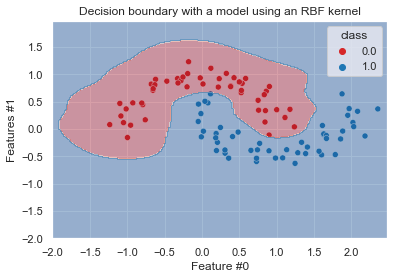

In [27]:
kernel_model.fit(data_moons, target_moons)
ax = sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                    hue=target_moons, palette=['tab:red', 'tab:blue'])
plot_decision_function(kernel_model, range_features_moons, ax=ax)
plt.title('Decision boundary with a model using an RBF kernel')

The decision boundary is not anymore a straight line. Indeed, an area is defined around the red samples and we could imagine that this classifier should be able to generalize on unseen data.

Let’s check the decision function on the second dataset.

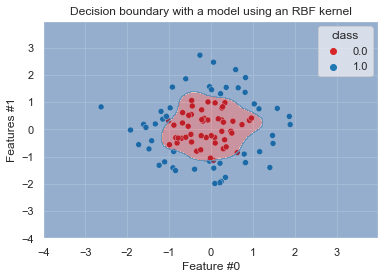

In [28]:
kernel_model.fit(data_gauss, target_gauss)
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                     hue=target_gauss, palette=["tab:red", "tab:blue"])
plot_decision_function(kernel_model, range_features_gauss, ax=ax)
_ = plt.title("Decision boundary with a model using an RBF kernel")

Kernel feature expansion are the tricks to make a linear classifier more expressive.

Keep in mind that adding flexibility to a model can also risk increasing overfitting by making the decision function to be sensitive to individual (possibly noisy) data points of the training set. Here we can observe that the decision functions remain smooth enough to preserve good generalization. 